# NEURAL NETWORK INTRODUCTION - MNIST WITH KERAS

** TUTORIAL KNOWLEDGE ASSUMPTION**

1. Linear Algebra Basics
2. Calculus Basics 
3. Neural Network Basics
4. Machine Learning Basics
5. Python Basics

**GOALS OF THE TUTORIAL**
1. Understand the MNIST dataset
2. Understand Keras' basics implementation
3. Manipulate vectors into correct format for computation

**MNIST DATASET**

The MNIST dataset is composed of 70 000 images that are:
1. Handwritten digits between 0 and 9
2. Normalized in size (28x28 pixel)
3. Grayscale (colour value between 0 and 255)

**KERAS**

The Keras library is:
1. A Machine Learning library 
2. A wrapper (simplified version) of the TensorFlow library
3. As powerful as TensorFlow
4. A higher level abstraction library, perfect for beginners

In [24]:
# numpy is a linear algebra library, we'll use it to perform vector manipulation 
import numpy as np

In [25]:
# pandas is a linear algebra library, we'll use it to display vectors
import pandas as pd

In [26]:
# PIL is a image manipulation library, we'll use its Image module to display images
from PIL import Image

In [27]:
# Keras is a neural network library, we'll use it to build the model
import keras

In [28]:
# Keras has the MNIST dataset embedded into its own installation
from keras.datasets import mnist

In [29]:
# Keras utilities are basics functions of keras, we'll use it to transform vectors
from keras.utils import np_utils

In [30]:
# Keras models are built by stacking functions one on top of another, the Sequential module is the glue between the layers
from keras.models import Sequential

In [31]:
# Keras function we use to construct the model
from keras.layers import Dense

In [34]:
# This is a bit of cheating to reduce the size of the dataset, its important since we're using GitHub, don't pay much
# attention to it though.
# Lets import the datasets images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The images dataset
images = np.concatenate((X_train, X_test))

#Their relative labels
labels = np.concatenate((y_train, y_test))

give a index between 0 and 59999: 44


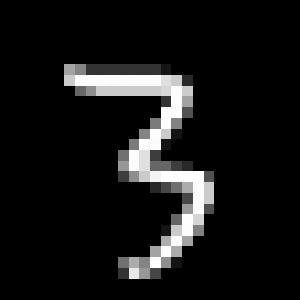

In [35]:
# Lets look at some images, first let pick some index
index = input('give a index between 0 and 59999: ')

# Lets use PIL to build an image representation of the matrix
img = Image.fromarray(images[index])

# Lets resize the image so we can see it better 
img = img.resize((300, 300))

# Lets display the image
img

In [36]:
# Lets look at the corresponding label
labels[index]

3

In [37]:
# Lets look at the vector representation of this image using the pandas DataFrame module
pd.DataFrame(images[index])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,163,132,51,51,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,203,253,252,253,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,103,142,203,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So we understand that for every photo in the images dataset, we get a corresponding label in the labels dataset.

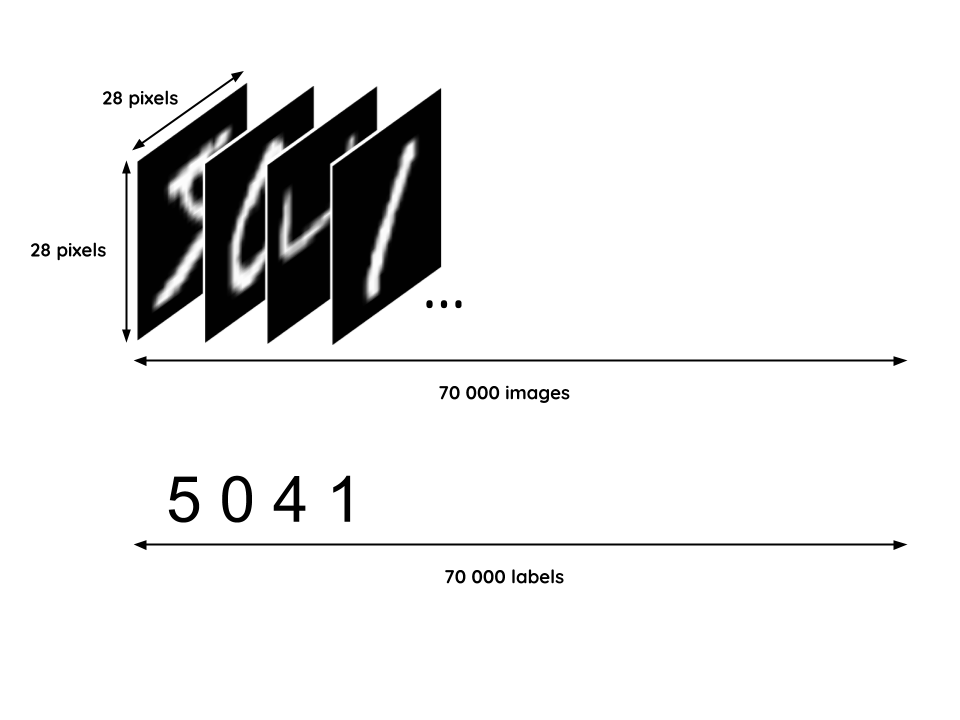

In [38]:
Image.open('images/MNIST.png')

Unfortunately, computers cannot inger data in the various form we do, the data needs to be transform in some way so the machine can figure out something out of it. Namely:
1. Images must be flatten up
2. Images must be normalized between 0 and 1
3. Labels must be treated as categories

In [39]:
# Flattening images
images = images.reshape(70000, 784)

In [40]:
# Normalizing between 0 and 1
images = images/255.0

In [41]:
# Now, before any transformations, labels look like this
pd.DataFrame(labels)

,0
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3
8,1
9,4


In [42]:
# Lets do some transformation to the labels
labels = np_utils.to_categorical(labels)
pd.DataFrame(labels)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Lets see what this transformation has done to the label of the chosen photo
print(labels[index])
print('See how the 1. is placed at the ' + str(np.argmax(labels[index])) + 'th position')

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
See how the 1. is placed at the 3th position


This is called *encoding labels as dummy variables* turning each categories into a column and marking with a 1 the corresponding column. Think about it thoroughly, it is hard to grasp at first.

In order to train and test our model, we'll break the both the images set and label set into two parts, the training and the testing. Lets take 60000 images as our training set and 1000 images as our testing set. Those numbers are arbitrary and feel free to play around other numbers to see what happens.

In [44]:
# [:number] means from the beginning to this number excluding it
images_train = images[:60000]
labels_train = labels[:60000]

# [number:] means from this number including it to the end
images_test = images[60000:]
labels_test = labels[60000:]

**We are now ready to create the Neural Network using keras.**

In [45]:
# model will be created layer by layer.
model = Sequential()

Lets add a feedforward layer to our model, feedforward layer are called dense in the keras vocabulary. Lets specify the input dimension to be 784 since every flatten image has that length, and the output dimension to be 10 since we have 10 different digit to classify to. The activation, softmax is a function that oblige output to be really near binary.

In [46]:
# Lets add a Dense layer to our model
model.add(Dense(output_dim=10, input_dim=784, activation='softmax'))

Lets compile the model, this layer close the model and define how we will optimize it. As previously seen in Neural Network tutorial, optimization in neural network sense is to roll a marble up and down hills looking for the lowest valley. The optimizer is the hand that throw the marble and the metrics is the how good the marble is doing at finding the minimum. 

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#Lets initiate the computation by trying to fit the training dataset to the labels
model.fit(images_train, labels_train)

Epoch 1/10
32896/60000 [===============>..............] - ETA: 3s - loss: 0.5744 - acc: 0.8539

KeyboardInterrupt: 

In [ ]:
# Lets calculate accuracy on the testing set
accuracy = model.evaluate(images_test, labels_test)[1]
'accuracy: ' + str(accuracy*100) + '%'